In [1]:
import sys
import geopandas
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

sys.path.insert(0,'..')
from garmin_fit_eda.file_reader import file_to_dataframe

In [2]:
INPUT_FILE = '../data/A1TI3754.FIT'

In [3]:
df_fit = file_to_dataframe(INPUT_FILE)

In [4]:
df_fit[['position_lat','position_lat_units','position_long','position_long_units']].head()

,position_lat,position_lat_units,position_long,position_long_units
0,531355612,semicircles,135403363,semicircles
1,531355667,semicircles,135403385,semicircles
2,531355963,semicircles,135403388,semicircles
3,531356087,semicircles,135403522,semicircles
4,531356069,semicircles,135403762,semicircles


In [5]:
def semicircles_to_degrees(semicircles):
    return semicircles * 180.0 / 2**31 

In [6]:
df_conv = pd.DataFrame()

df_conv['lat'] = df_fit.position_lat.apply(semicircles_to_degrees)
df_conv['long'] = df_fit.position_long.apply(semicircles_to_degrees)

gdf_fit = geopandas.GeoDataFrame(
    df_conv, geometry=geopandas.points_from_xy(df_conv.long, df_conv.lat))

In [7]:
df_conv.head()

,lat,long,geometry
0,44.537713,11.349379,POINT (11.34938 44.53771)
1,44.537718,11.349381,POINT (11.34938 44.53772)
2,44.537742,11.349381,POINT (11.34938 44.53774)
3,44.537753,11.349392,POINT (11.34939 44.53775)
4,44.537751,11.349412,POINT (11.34941 44.53775)


In [8]:
df_conv['lat'].max()

44.54163202084601

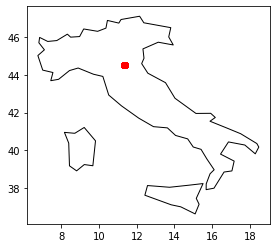

In [9]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world[world.name == 'Italy'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf_fit.plot(ax=ax, color='red')

In [50]:
# gdf_fit = gdf_fit.to_crs(epsg=3857) # ValueError: Cannot transform naive geometries.  Please set a crs on the object first.
gdf_fit.crs = {'init' :'epsg:3857'}

## Using OpenStreetMap as base layer
http://geopandas.org/gallery/plotting_basemap_background.html